In [1]:
## this makes figure 6 of the LVDB overview paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

from galpy.potential import KeplerPotential, vesc

In [3]:
## pretty plots 
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## load and combine all dwarf galaxies (complete and distant)
dwarf_all = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_all.csv')
lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')

x = ['ref_proper_motion', ] ## might need to be added , 'ref_metallicity_photometric'
dwarf_all.remove_columns(x)
lf_distant.remove_columns(x)
comb_new = table.vstack((dwarf_all, lf_distant))

In [5]:
## load locally
dwarf_all = table.Table.read('../data/dwarf_all.csv')
lf_distant = table.Table.read('../data/dwarf_local_field_distant.csv')

x = ['ref_proper_motion', 'ref_metallicity_photometric']
dwarf_all.remove_columns(x)
lf_distant.remove_columns(x)
comb_new = table.vstack((dwarf_all, lf_distant))

In [6]:
## simple Hubble flow model
## numbers should match Penarrubia et al 2014  
## https://ui.adsabs.harvard.edu/abs/2014MNRAS.443.2204P/abstract 
def velocity_relation(r, A = 76.5, B = 46.6 ):
    return  A*r - B/np.sqrt(r) 
Gravity = 4.301e-6

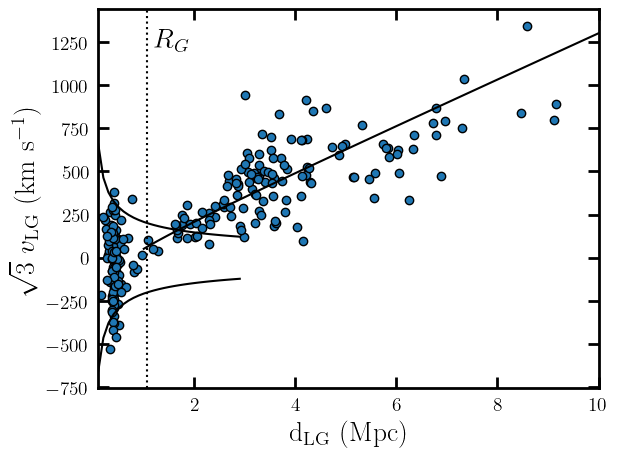

In [7]:

plt.plot(comb_new['distance_lg']/1e3, np.sqrt(3.)*comb_new['velocity_lg'] , 'o', mec='k')
plt.xlabel(r'${\rm d_{\rm LG}~(Mpc)}$')
plt.ylabel(r'$ \sqrt{3}~ v_{\rm LG}~({\rm km~s^{-1}})$')

plt.axvline(1.06, c='k',ls=':')

plt.text((1.06*1.1)/10.5, .9, r'$R_G$', fontsize=20, horizontalalignment='left', transform=plt.gca().transAxes)

rad2 = np.arange(.1,3,.1)
plt.plot(rad2, +vesc(KeplerPotential(amp=Gravity*5e12, normalize=False),rad2*1000.), c='k')
plt.plot(rad2, -vesc(KeplerPotential(amp=Gravity*5e12, normalize=False),rad2*1000.), c='k')
rad3 = np.arange(1, 10.1, .1)
plt.plot(rad3, velocity_relation(rad3)*np.sqrt(3), c='k')

plt.xlim(0.1, 10.)

plt.tight_layout()
plt.savefig('rad_velocity_LG2.pdf')
plt.show()